# 绘制手动神经网络和pytorch框架的效果

In [1]:
import numpy as np

In [8]:
def get_Data(file):
    data = np.loadtxt(file, skiprows=1)
    labels = "epoch train_loss test_loss  accuracy".split()
    return labels, data

In [10]:
labels, data_np_adam = get_Data("single_layer_numpy_adam.txt")

In [11]:
labels, data_np_sgd = get_Data("single_layer_numpy_sgd.txt")

In [12]:
labels, data_pytorch_adam = get_Data("single_layer_pytorch_adam.txt")

In [13]:
labels, data_pytorch_sgd = get_Data("single_layer_pytorch_sgd.txt")

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

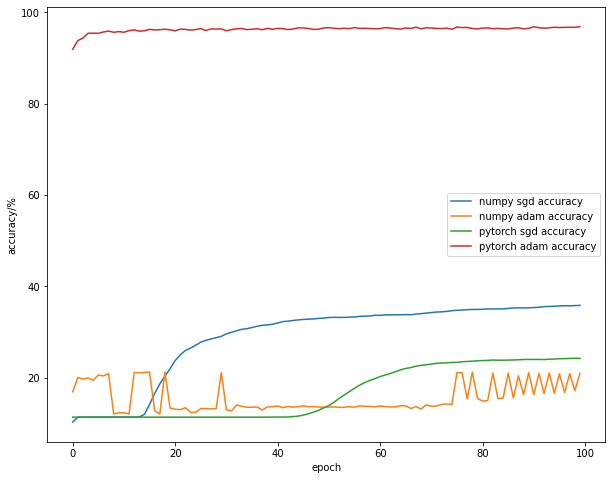

In [44]:
data = pd.DataFrame({"numpy sgd accuracy":data_np_sgd[:, 2]*100,
                     "numpy adam accuracy":data_np_adam[:, 2]*100,
                     "pytorch sgd accuracy":data_pytorch_sgd[:, 2]*100,
                     "pytorch adam accuracy":data_pytorch_adam[:, 2]*100,})
data.plot.line(figsize=(10,8))

plt.xlabel("epoch")
plt.ylabel("accuracy/%")
plt.savefig("准确率.png", dpi=300)

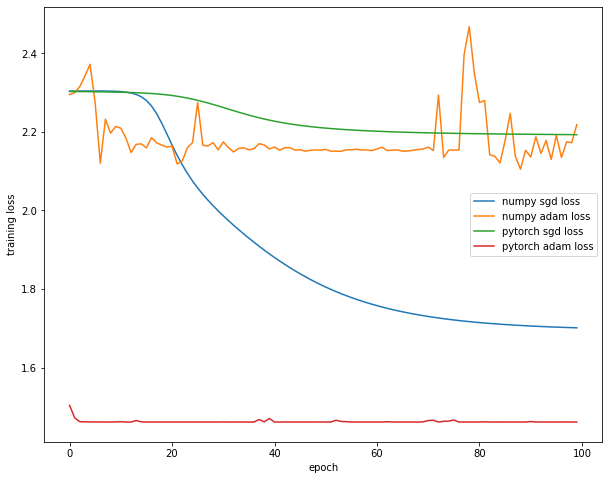

In [45]:
data = pd.DataFrame({"numpy sgd loss":data_np_sgd[:, 0],
                     "numpy adam loss":data_np_adam[:, 0],
                     "pytorch sgd loss":data_pytorch_sgd[:, 0],
                     "pytorch adam loss":data_pytorch_adam[:, 0],})
data.plot.line(figsize=(10,8))

plt.xlabel("epoch")
plt.ylabel("training loss")
plt.savefig("损失.png", dpi=300)

In [16]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.120,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.330,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.930,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.100,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.930,13177000,16788.62948,AUS,36
65,Australia,Oceania,1977,73.490,14074100,18334.19751,AUS,36
66,Australia,Oceania,1982,74.740,15184200,19477.00928,AUS,36
67,Australia,Oceania,1987,76.320,16257249,21888.88903,AUS,36
68,Australia,Oceania,1992,77.560,17481977,23424.76683,AUS,36
69,Australia,Oceania,1997,78.830,18565243,26997.93657,AUS,36
